In [ ]:
import pandas as pd
path = "https://github.com/alexesc/data/raw/main/enero2023.xlsx"
sheet_name = "charts"
pollutants = pd.read_excel(path, sheet_name, engine='openpyxl')

# Convert the time column to a datetime data type
pollutants['time'] = pd.to_datetime(pollutants['time'])

# Set the time column as the index of the DataFrame
pollutants.set_index('time', inplace=True)
pollutants_15min = pollutants.resample('15T').mean()
#pollutants_15min['flow'] = pollutants_15min['flow'].ffill()
#pollutants_15min['rainfall'] = pollutants_15min['rainfall'].ffill()

In [ ]:
from scipy.interpolate import interp1d
from pandas import Timedelta
# Get the start date of the data
start_date = pollutants_15min.index[0]

# Convert the index to a TimedeltaIndex by subtracting the start date
pollutants_15min.index = pollutants_15min.index - start_date

# Convert the index to a numeric type by dividing the total number of seconds by the number of seconds in 15 minutes
pollutants_15min.index = pollutants_15min.index.total_seconds() / (15 * 60)

# Convert the index to a numeric type by dividing it by a Timedelta object with a frequency of 15 minutes
# pollutants_15min.index = pollutants_15min.index / Timedelta(minutes=15)

pollutants_15min['flow_interp'] = pollutants_15min['flow'].interpolate()
pollutants_15min['rainfall_interp'] = pollutants_15min['rainfall'].interpolate()
pollutants_15min['nh3_interp'] = pollutants_15min['nh3'].interpolate()
pollutants_15min['no2_interp'] = pollutants_15min['no2'].interpolate()
pollutants_15min['no3_interp'] = pollutants_15min['no3'].interpolate()
pollutants_15min['p_interp'] = pollutants_15min['p'].interpolate()
pollutants_15min['ss_interp'] = pollutants_15min['ss'].interpolate()
pollutants_15min['tss_interp'] = pollutants_15min['tss'].interpolate()

# interp_flow = interp1d(pollutants_15min.index, pollutants_15min['flow'], kind='linear')
# interp_flow = interp1d(pollutants_15min.index, pollutants_15min['flow'], kind=3)
# Cubic interpolation
#interp_flow = interp1d(pollutants_15min.index, pollutants_15min['flow'], kind='cubic')
#interp_rainfall = interp1d(pollutants_15min.index, pollutants_15min['rainfall'], kind='cubic')

# Use the interpolation function to interpolate the values
#pollutants_15min['flow'] = interp_flow(pollutants_15min.index)
#pollutants_15min['rainfall'] = interp_rainfall(pollutants_15min.index)

#print(pollutants_15min.columns)

In [ ]:
from google.colab import files
#pollutants_15min
# Save the data to an Excel file
pollutants_15min.to_excel('pollutants_15min.xlsx', sheet_name='Sheet1')

# Download the Excel file to your local machine
files.download('pollutants_15min.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

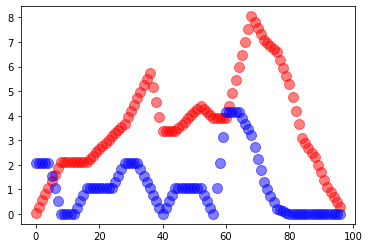

In [ ]:
import matplotlib.pyplot as plt

# Plot the flow and rainfall data
# pollutants_15min.plot(x=None, y=['flow_interp', 'rainfall_interp'])

# create a scatter plot with smooth lines for the 'flow_interp' column
plt.scatter(pollutants_15min.index, pollutants_15min['flow_interp'], color='red', alpha=0.5, s=100)

# create a scatter plot with smooth lines for the 'rainfall_interp' column
plt.scatter(pollutants_15min.index, pollutants_15min['rainfall_interp'], color='blue', alpha=0.5, s=100)

# show the plot
plt.show()

# Show the plot
plt.show()